Importing Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Loading Dataset

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data = pd.read_csv(url, names=columns, na_values=' ?', skipinitialspace=True)

Pre Processing

In [ ]:
data = data.dropna()

encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

X = data.drop('income', axis=1)
y = data['income']
data

age  workclass  fnlwgt  education  education-num  marital-status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               1             1     4    1          2174             0   
1               4             0     4    1             0             0   
2               6             1     4    1             0             0   
3               6             0     2    1             0             0   
4              10             5     2    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32556          13             5     4    0             0             0   
32557           7             0     4    1             0             0   
32558           1             4     4    0             0             0   
32559           1             3     4    1             0             0   
32560           4             5     4    0         15024             0   

       hours-per-week  native-country  income  
0                  40              39       0  
1                  13              39       0  
2                  40              39       0  
3                  40              39       0  
4                  40               5       0  
...               ...             ...     ...  
32556              38              39       0  
32557              40              39       1  
32558              40              39       0  
32559              20              39       0  
32560              40              39       1  

[32561 rows x 15 columns]

Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

Accuracy

In [ ]:
print("Accuracy of the classifier:", accuracy)

Accuracy of the classifier: 0.8616612927990174


Bias Detection

In [ ]:
def calculate_disparate_impact(y_true, y_pred, sensitive_feature_values):
    positive_outcomes = {}
    for value in sensitive_feature_values:
        positive_outcomes[value] = sum((y_pred == 1) & (sensitive_feature_values == value)) / sum(sensitive_feature_values == value)

    min_positive_outcome = min(positive_outcomes.values())
    max_positive_outcome = max(positive_outcomes.values())
    disparate_impact_ratio = min_positive_outcome / max_positive_outcome

    return disparate_impact_ratio

sensitive_feature_values = X_test['sex']
disparate_impact_ratio = calculate_disparate_impact(y_test, y_pred, sensitive_feature_values)
print("Disparate impact ratio:", disparate_impact_ratio)


Disparate impact ratio: 0.3007812873702505


Bias Mitigation

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

clf_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
clf_resampled.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = clf_resampled.predict(X_test)
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print("Accuracy of the classifier after bias mitigation:", accuracy_resampled)


Accuracy of the classifier after bias mitigation: 0.8475356978350991


In [ ]:
disparate_impact_ratio_resampled = calculate_disparate_impact(y_test, y_pred_resampled, sensitive_feature_values)
print("Disparate impact ratio after bias mitigation:", disparate_impact_ratio_resampled)
print("Accuracy of the classifier after bias mitigation:", accuracy_resampled)


Disparate impact ratio after bias mitigation: 0.2994213041569136
Accuracy of the classifier after bias mitigation: 0.8475356978350991


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix_before = confusion_matrix(y_test, y_pred)
print("Confusion Matrix Before Bias Mitigation:")
print(conf_matrix_before)
conf_matrix_after = confusion_matrix(y_test, y_pred_resampled)
print("\nConfusion Matrix After Bias Mitigation:")
print(conf_matrix_after)

Confusion Matrix Before Bias Mitigation:
[[4601  341]
 [ 560 1011]]

Confusion Matrix After Bias Mitigation:
[[4430  512]
 [ 481 1090]]


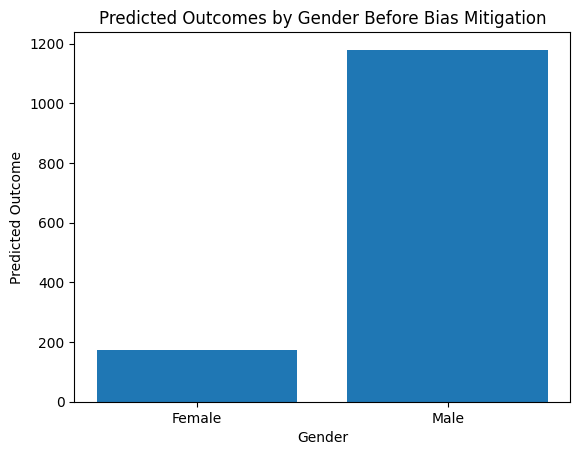

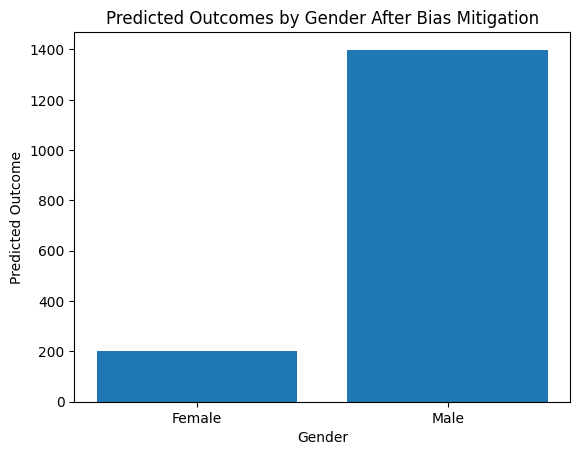

In [ ]:
import matplotlib.pyplot as plt

def plot_predicted_outcomes(y_true, y_pred, sensitive_feature_values, title):
    unique_values = np.unique(sensitive_feature_values)
    outcomes_by_group = []
    for value in unique_values:
        outcomes_by_group.append(sum(y_pred[sensitive_feature_values == value]))

    plt.bar(unique_values, outcomes_by_group)
    plt.title(title)
    plt.xlabel("Gender")
    plt.ylabel("Predicted Outcome")
    plt.xticks(unique_values, ['Female', 'Male'])
    plt.show()

plot_predicted_outcomes(y_test, y_pred, X_test['sex'], "Predicted Outcomes by Gender Before Bias Mitigation")

plot_predicted_outcomes(y_test, y_pred_resampled, X_test['sex'], "Predicted Outcomes by Gender After Bias Mitigation")
